In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('bmh')

In [3]:
df = pd.read_parquet('../data/01-08-2023/FEATURE_DATA_FMT')
df

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_TXN_AMT_SUM_36M,CASA_BAL_SUM_LATEST,LOAN_SUM_LATEST
CUSTOMER_CDE,,,,,,,,,,,
1147729,VN0010006,"Kinh doanh tai san, dich vu tu van",Trước Gen X,Cuối sự nghiệp,64.0,5106.0,NaN,5.618276e+09,1.492584e+10,2.768965e+09,NaN
2272671,VN0010003,"HDong Dang, Doan The va Hiep Hoi",Gen X,Thiết lập tài sản,44.0,4445.0,NaN,4.345156e+09,1.437412e+10,2.821076e+09,NaN
9810183,VN0010006,"Qly nha nuoc, an ninh, quoc phong",Gen X,Bảo vệ tài sản,54.0,2450.0,NaN,7.288290e+07,1.739562e+09,2.955148e+09,NaN
8237138,VN0010006,"Kinh doanh tai san, dich vu tu van",Trước Gen X,Nghỉ hưu,80.0,2697.0,NaN,3.290991e+08,1.653713e+09,3.116366e+09,NaN
5724871,VN0010008,"Nong, lam nghiep",Gen X,Thiết lập tài sản,45.0,3123.0,NaN,5.408979e+10,5.069935e+10,3.589910e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10529301,VN0010008,"Thuong nghiep, sua chua",Gen Y,Lập gia đình,31.0,2271.0,NaN,8.836824e+08,2.580183e+09,1.346638e+07,NaN
10511410,VN0010007,"Kinh doanh tai san, dich vu tu van",Gen Z,Bắt đầu sự nghiệp,23.0,2274.0,NaN,5.354488e+07,3.191000e+07,2.474762e+07,NaN
10524429,VN0010003,Unknown,Gen Y,Thiết lập tài sản,40.0,2272.0,NaN,6.206408e+08,8.493724e+10,1.791721e+08,NaN


In [4]:
# df = pd.read_parquet('../data/01-07-2023/DATA_LABEL')
# df[(df['REACTIVATED_CASA']==1) & (df['LOAN_SUM_LATEST'].notnull()) & (df['CASA_BAL_SUM_36M'].notnull())]

In [5]:
df.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG', 'AGE', 'LOR',
       'CREDIT_SCORE', 'CASA_BAL_SUM_36M', 'CASA_TXN_AMT_SUM_36M',
       'CASA_BAL_SUM_LATEST', 'LOAN_SUM_LATEST'],
      dtype='object')

In [6]:
X = df

In [7]:
y = pd.read_parquet('../data/01-07-2023/REACTIVATED_CASA')
y = y[['CUSTOMER_CDE', 'FTR_VAL']]
y.rename(columns={'FTR_VAL': 'REACTIVATED_CASA'}, inplace=True)
y['REACTIVATED_CASA'] = y['REACTIVATED_CASA'].astype(int)

In [8]:
y

,CUSTOMER_CDE,REACTIVATED_CASA
0,5493517,0
1,9641850,0
2,6309615,0
3,6743366,0
4,11903114,0
...,...,...
1016727,17617923,0
1016728,17619581,0
1016729,17584129,0
1016730,17596343,0


In [9]:
X = X.merge(y, how='inner', left_index=True, right_on='CUSTOMER_CDE')

In [10]:
y = X.pop('REACTIVATED_CASA')
X = X.drop(columns=['CUSTOMER_CDE'])

In [11]:
model = pickle.load(open('../model/pipeline_xgboost_casa_forward_6mob','rb'))
model

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('log_tf',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CASA_BAL_SUM_LATEST',
                                                   'LOAN_SUM_LATEST',
                                                   'CASA_BAL_SUM_36M',
                                                   'CASA_TXN_AMT_SUM_36M']),
                                                 ('num2'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

<Axes: >

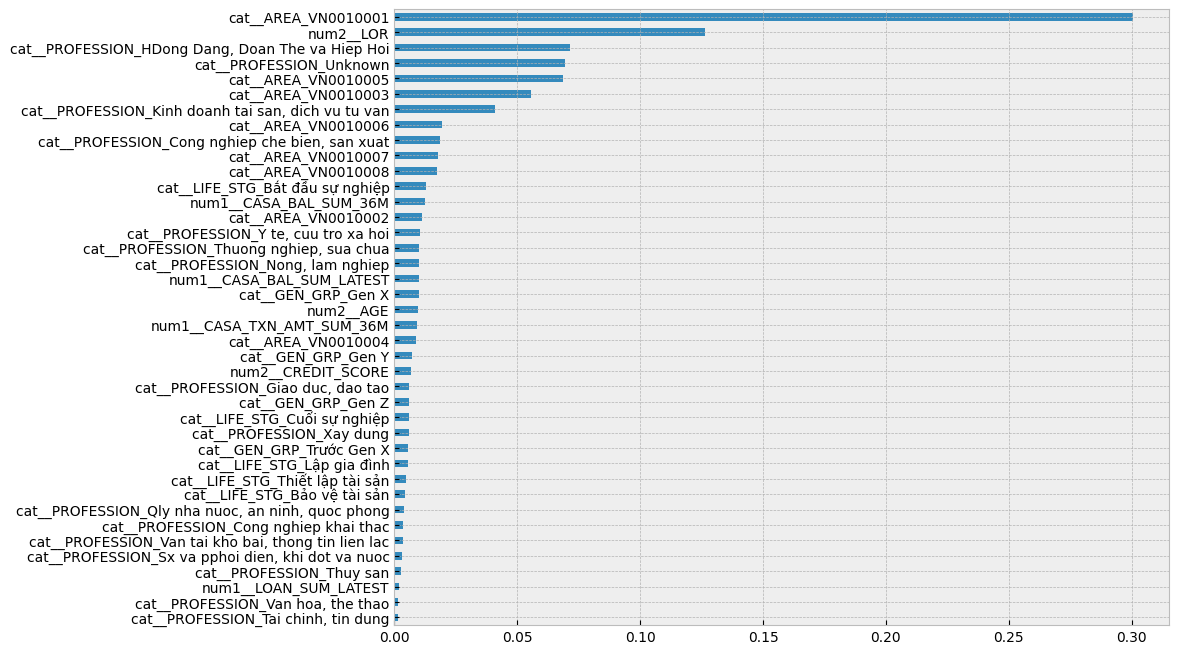

In [12]:
featimp_series = pd.Series(model[-1].feature_importances_, index=model[:-1].get_feature_names_out())
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [13]:
y_pred = model.predict(X)
y_prob = model.predict_proba(X)

In [14]:
from sklearn import metrics
import seaborn as sns

In [15]:
pd.Series(y_pred).value_counts(), pd.Series(y_pred).value_counts(normalize=True)

(0    1015062
 1       1670
 dtype: int64,
 0    0.998357
 1    0.001643
 dtype: float64)

In [16]:
p,r,f,_ = metrics.precision_recall_fscore_support(y, y_pred)
auc = metrics.roc_auc_score(y, y_prob[:,1])
gini = 2 * auc - 1
print(p,r,f)
print(auc,gini)
print(metrics.classification_report(y, y_pred))

[0.98258432 0.81856287] [0.9996963  0.07177737] [0.99106645 0.13198166]
0.9074221720520845 0.8148443441041691
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    997687
           1       0.82      0.07      0.13     19045

    accuracy                           0.98   1016732
   macro avg       0.90      0.54      0.56   1016732
weighted avg       0.98      0.98      0.97   1016732



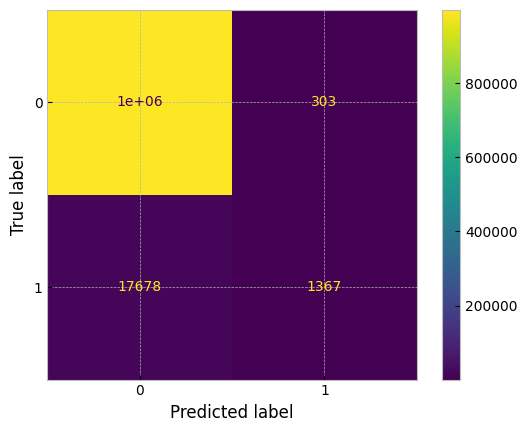

In [17]:
metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)

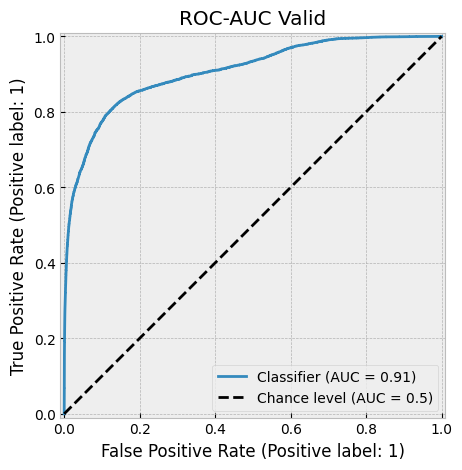

In [18]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.RocCurveDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('ROC-AUC Valid')
plt.grid = True
plt.show()

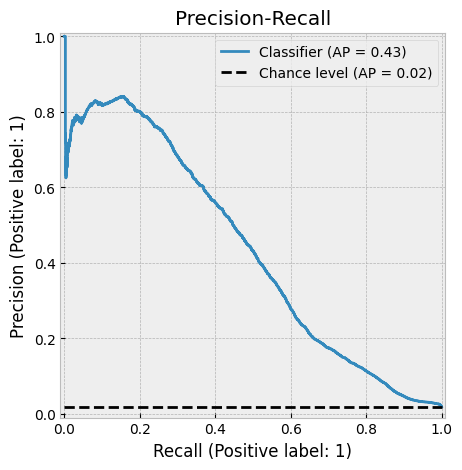

In [19]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.PrecisionRecallDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('Precision-Recall')
axs.legend(loc='upper right')
plt.show()

In [20]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

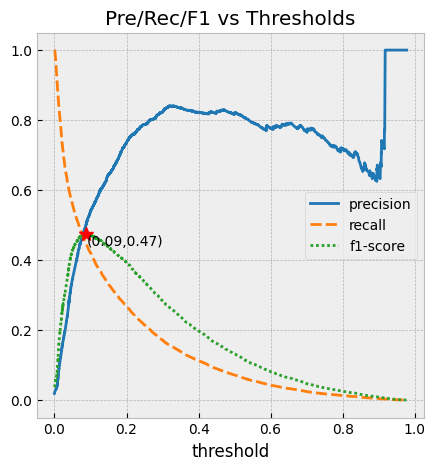

In [21]:
fig, axs = plt.subplots(1,1,figsize=(5, 5))
plot_precision_recall_with_thresholds(y, y_prob[:,1], ax=axs)
axs.set_title('Pre/Rec/F1 vs Thresholds')
plt.show()